In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.layers import Conv2D , Dense, Flatten,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/gt_db/train'
test_path = '/content/drive/MyDrive/gt_db/test'

In [ ]:
image_size = [256,256]
batch_size = 4
gen = ImageDataGenerator(rescale=1.0/255,preprocessing_function=preprocess_input)

In [ ]:
train_gen = gen.flow_from_directory(directory=train_path,target_size=image_size,shuffle=True,batch_size=batch_size)

Found 600 images belonging to 50 classes.


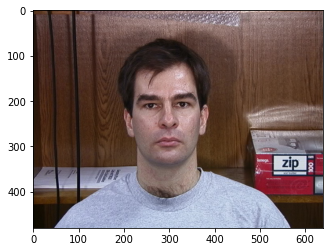

In [ ]:

plt.imshow(image.load_img('/content/drive/MyDrive/gt_db/train/s01/01.jpg'))
plt.show()

In [ ]:
test_gen = gen.flow_from_directory(directory=test_path,target_size = image_size)

Found 150 images belonging to 50 classes.


In [ ]:
vgg = VGG16(include_top=False,input_shape=image_size+[3],)

In [ ]:
vgg.trainable=False;

In [ ]:
x = Flatten()(vgg.output)
x = Dense(50,activation='softmax')(x)
model = Model(inputs = vgg.input,outputs = x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
steps_per_epoch = 600//batch_size
valid_steps_per_epoch = 150//batch_size

In [ ]:
model.fit_generator(train_gen,validation_data=test_gen,epochs=4,steps_per_epoch=steps_per_epoch,validation_steps=valid_steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
150/150 [==============================] - 552s 4s/step - loss: 3.0062 - accuracy: 0.6517 - val_loss: 0.3854 - val_accuracy: 0.8533
Epoch 2/4
150/150 [==============================] - 402s 3s/step - loss: 0.4100 - accuracy: 0.9367
Epoch 3/4
150/150 [==============================] - 399s 3s/step - loss: 0.1508 - accuracy: 0.9833
Epoch 4/4
150/150 [==============================] - 397s 3s/step - loss: 5.8211e-04 - accuracy: 1.0000
